In [8]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

from keras.datasets import mnist

In [9]:
(train_img, train_labels), (test_img, test_labels) = mnist.load_data()

In [10]:
train_img.shape

(60000, 28, 28)

In [24]:
x_train = train_img.reshape(train_img.shape[0],-1).astype('float32')
x_train.shape

(60000, 784)

In [25]:
test_img.shape

(10000, 28, 28)

In [26]:
x_test = test_img.reshape(test_img.shape[0],-1).astype('float32')
x_test.shape

(10000, 784)

In [27]:
train_labels.shape

(60000,)

In [28]:
test_labels.shape

(10000,)

In [29]:
lb = LabelBinarizer()
y_train = lb.fit_transform(train_labels)
y_test = lb.transform(test_labels)

In [30]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [31]:
x_train /= 255.0
x_test /= 255.0

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Input
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
his = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9301 - loss: 0.2464 - val_accuracy: 0.9326 - val_loss: 0.2342
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9324 - loss: 0.2370 - val_accuracy: 0.9349 - val_loss: 0.2263
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9351 - loss: 0.2283 - val_accuracy: 0.9358 - val_loss: 0.2202
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9370 - loss: 0.2204 - val_accuracy: 0.9401 - val_loss: 0.2124
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9397 - loss: 0.2130 - val_accuracy: 0.9422 - val_loss: 0.2062
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9413 - loss: 0.2060 - val_accuracy: 0.9433 - val_loss: 0.2004
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9423 - loss: 0.1994 - val_accuracy: 0.9449 - val_loss: 0.1957
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9449 - loss: 0.1934 - val_accurac

In [49]:
test_loss, test_accu = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9461 - loss: 0.1817


In [50]:
import numpy as np
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_true, y_pred)

0.9461

In [52]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.94      0.95      0.95      1032
           3       0.93      0.95      0.94      1010
           4       0.95      0.93      0.94       982
           5       0.94      0.92      0.93       892
           6       0.94      0.97      0.96       958
           7       0.96      0.93      0.94      1028
           8       0.94      0.91      0.93       974
           9       0.91      0.94      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [53]:
his.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

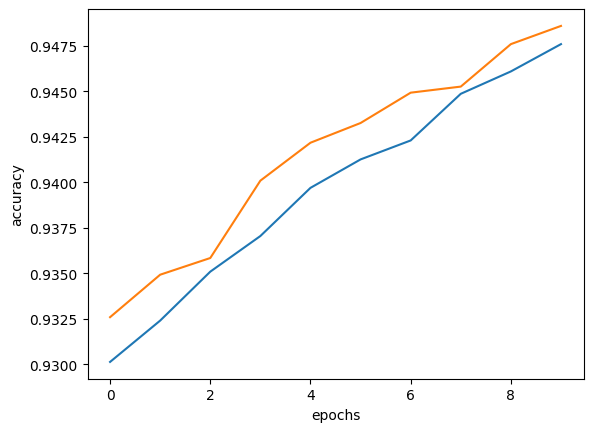

In [56]:
plt.plot(his.history['accuracy'], label='train_accuracy')
plt.plot(his.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [59]:
import random 
idx = random.randint(0,9999)
x_test[idx].shape

(784,)

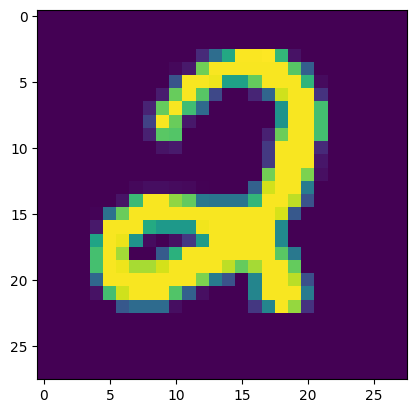

In [61]:
idx = random.randint(0,9999)
plt.imshow(x_test[idx].reshape(28,28))
plt.show()

In [66]:
pred = model.predict(x_test)
print(np.argmax(pred[idx]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
2
